<a href="https://colab.research.google.com/github/manisankar29/Deep-Learning/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiclass Classification on Cats and Dogs**

## Installing tensorflow

In [1]:
!pip install tensorflow

## import necessary libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

## Importing and extracting 'cats_and_dogs' dataset

In [3]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=url, extract=True)

68606236/68606236 [==============================] - 4s 0us/step


In [4]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [5]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validate_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validate_cats_dir = os.path.join(validate_dir, 'cats')
validate_dogs_dir = os.path.join(validate_dir, 'dogs')

## EDA (Exploratory Data Analysis)

In [6]:
nums_cats_tr = len(os.listdir(train_cats_dir))
nums_dogs_tr = len(os.listdir(train_dogs_dir))
nums_cats_val = len(os.listdir(validate_cats_dir))
nums_dogs_val = len(os.listdir(validate_dogs_dir))
total_train = nums_cats_tr + nums_dogs_tr
total_val = nums_cats_val + nums_dogs_val

print(f"Total training cat images: {nums_cats_tr}")
print(f"Total training dog images: {nums_dogs_tr}")
print(f"Total validation cat images: {nums_cats_val}")
print(f"Total validation dog images: {nums_dogs_val}")
print(f"Total training images: {total_train}")
print(f"Total validation images: {total_val}")

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
Total training images: 2000
Total validation images: 1000


In [7]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255)
val_image_generator = ImageDataGenerator(rescale=1./255)

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=100,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(150,150),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [11]:
val_data_gen = val_image_generator.flow_from_directory(batch_size=100,
                                                       directory=validate_dir,
                                                       shuffle=True,
                                                       target_size=(150,150),
                                                       class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
sample_training_images, _ = next(train_data_gen)

In [13]:
def plotimages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

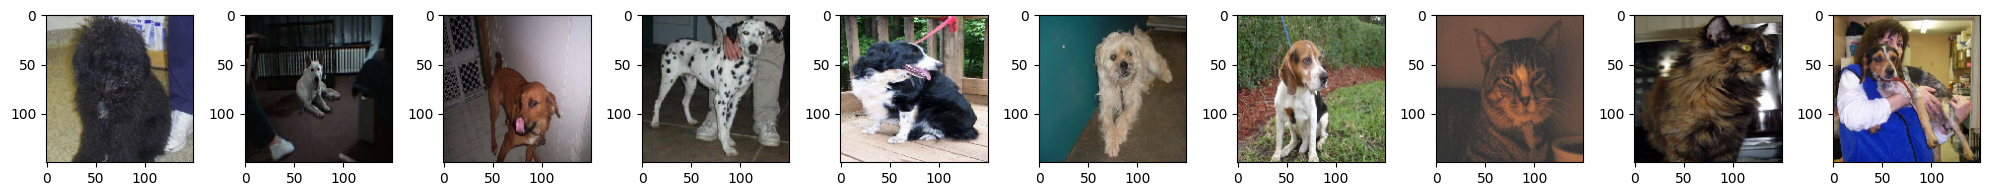

In [14]:
plotimages(sample_training_images[:10])

## Developing model

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Validating model

In [19]:
EPOCHS = 20
history = model.fit(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs = EPOCHS,
    validation_data = train_data_gen,
    validation_steps = int(np.ceil(total_val/float(BATCH_SIZE)))
)

Epoch 1/20
20/20 [==============================] - 5s 249ms/step - loss: 0.6936 - accuracy: 0.5050 - val_loss: 0.6904 - val_accuracy: 0.6020
Epoch 2/20
20/20 [==============================] - 7s 337ms/step - loss: 0.6866 - accuracy: 0.5575 - val_loss: 0.6829 - val_accuracy: 0.5340
Epoch 3/20
20/20 [==============================] - 6s 301ms/step - loss: 0.6591 - accuracy: 0.6100 - val_loss: 0.6522 - val_accuracy: 0.6180
Epoch 4/20
20/20 [==============================] - 7s 333ms/step - loss: 0.6317 - accuracy: 0.6425 - val_loss: 0.6169 - val_accuracy: 0.6620
Epoch 5/20
20/20 [==============================] - 6s 291ms/step - loss: 0.6079 - accuracy: 0.6675 - val_loss: 0.5792 - val_accuracy: 0.7130
Epoch 6/20
20/20 [==============================] - 5s 253ms/step - loss: 0.5648 - accuracy: 0.7180 - val_loss: 0.5391 - val_accuracy: 0.7250
Epoch 7/20
20/20 [==============================] - 6s 312ms/step - loss: 0.5269 - accuracy: 0.7335 - val_loss: 0.4817 - val_accuracy: 0.7720
Epoch 

The final accuracy achieved by multiclass classification is 99.70%